<h1><center>
PRACTICA 2 SEMILLAS
</center></h1>

<h1><center>
![Image of Yaktocat](http://www.prodelagro.com/images/stories/virtuemart/product/Semillas/quinua-blanca-convencional.jpg)
</center></h1>

## Deep Learning Project 

Developed by [Sergio Castelblanco](www.linkedin.com/in/sergio-castelblanco), [Aleksey Sepulveda](www.linkedin.com/in/sergio-castelblanco), [Eduardo Sandoval](www.linkedin.com/in/sergio-castelblanco)


version 1.1, Noviembre 1  2018

In [0]:
!pip3 install livelossplot
#! apt install python-pydot python-pydot-ng graphviz
#!pip install pydot
#!pip install graphviz

  Running setup.py bdist_wheel for livelossplot ... - done
  Stored in directory: /root/.cache/pip/wheels/67/8b/e9/3990164e3b2a421145b9d9d76fc8aa889225d495b043faeb73
Successfully built livelossplot


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os
from pylab import imshow, show, get_cmap


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop, adam, nadam,adadelta,adamax
from livelossplot import PlotLossesKeras
from keras import regularizers

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Conv1D
from keras.layers import Activation, Dropout, Flatten, Dense ,BatchNormalization
from keras import backend as K
from keras import optimizers as opts
from keras.callbacks import History
from livelossplot import PlotLossesKeras


%matplotlib inline
#%matplotlib 
#plt.rcParams['figure.figsize'] = (16, 9)
#plt.style.use('seaborn-notebook')
plt.style.use('ggplot')
#plt.style.use('dark_background')
#plt.style.use('presentation')

In [0]:
if not os.path.exists('base de datos full.xlsx'):
  # Install the PyDrive wrapper & import libraries.
  # This only needs to be done once per notebook.
  !pip install -U -q PyDrive
  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials

  # Authenticate and create the PyDrive client.
  # This only needs to be done once per notebook.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Download a file based on its file ID(Grey).
  #
  # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
  file_id = '1v7PVkjxEcDtNyECXd_riG2YZaUlQWoUE'
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(downloaded['title'])

In [0]:
!ls

adc.json  sample_data  semillas.zip


In [0]:
import os 
import zipfile

# Extract images zip file
with zipfile.ZipFile("semillas.zip","r") as zip_ref:
    zip_ref.extractall(os.getcwd())

## Opcion 1 Carga Datos

(256, 256, 3)

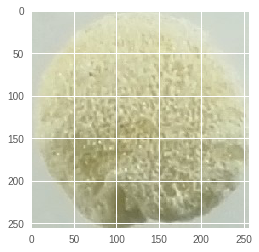

In [0]:
# Shows an image example of training set.
%matplotlib inline

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('Fotos/Quinua Aurora/QA-30 (2).jpg',grayscale=False,target_size=(256,256),interpolation='nearest')
x= img_to_array(img)
plt.imshow(x/255)
x.shape

In [0]:
import os
classes=os.listdir("Fotos")
classes

['Quinua Aurora', 'Quinua Blanca']

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img
import os

classes=os.listdir("Fotos")#!ls Quinua
image_list = np.empty((120,224,224,3))
class_list = []
n=0
for i in classes:
    listI=os.listdir('Fotos/'+i)
    for j in range(len(listI)):
        Path='Fotos/'+i+'/'+listI[j]
        img = load_img(Path,target_size=(224,224))  # this is a PIL image
        x = img_to_array(img)  # this is a Numpy array with shape (224, 224,3)
        x = x.reshape((1,) + x.shape)
        image_list[n]=x
        class_list.append(i)
        n=n+1
        #printProgressBar(n,120,prefix = 'Progress:', suffix = 'Complete', length = 50)

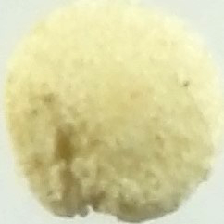

In [0]:
from keras.preprocessing.image import array_to_img
array_to_img(image_list[4])

In [0]:
from keras.applications.vgg16 import VGG16
model_vgg16=VGG16(weights='imagenet',include_top=True)

In [0]:
predict_list=model_vgg16.predict(image_list,verbose=1)

from keras.applications.vgg16 import decode_predictions
predicted_classes5=decode_predictions(predict_list)
predicted_classes=[]
for i in range(120):
    predicted_classes.append(predicted_classes5[i][0][1])
from collections import Counter
mc = []
for i in range(10):
    mc.append(Counter(predicted_classes).most_common(10)[i][0])
for i in range(120):
    if(predicted_classes[i] not in mc):
        predicted_classes[i]='Other'
        
import pandas as pd
d={'Real': class_list,'Prediccion': predicted_classes,'Objeto':range(120)}
results=pd.DataFrame(d)
pd.pivot_table(results,values='Objeto',index=['Prediccion'],columns=['Real'],aggfunc='count',margins=True).sort_values('All').fillna('')

120/120 [==============================] - 7s 57ms/step


Real,Quinua Aurora,Quinua Blanca,All
Prediccion,,,
pick,,1,1
ping-pong_ball,,1,1
sea_urchin,1,,1
paper_towel,1,1,2
toilet_tissue,1,1,2
bonnet,3,,3
jellyfish,6,8,14
golf_ball,12,14,26
face_powder,17,14,31


In [0]:
from sklearn.model_selection import train_test_split
path_train=[]
path_validation=[]
path_test=[]
class_train=[]
class_validation=[]
class_test=[]
for i in classes:
    listI=os.listdir('Fotos/'+i)
    Paths=[]
    cate=[]
    for j in range(len(listI)):
        Paths.append('Fotos/'+i+'/'+listI[j])
        cate.append(i)
    trainP, tempP, trainC, tempC = train_test_split(Paths,cate,test_size=0.3,random_state=123)
    valiP, testP, valiC, testC = train_test_split(tempP,tempC,test_size=0.4,random_state=123)
    path_train.extend(trainP)
    path_validation.extend(valiP)
    path_test.extend(testP)
    class_train.extend(trainC)
    class_validation.extend(valiC)
    class_test.extend(testC)
print('Train: ',len(path_train))
print('Validation: ',len(path_validation))
print('Test: ',len(path_test))

Train:  84
Validation:  20
Test:  16


In [0]:
image_list_train = np.empty((len(path_train),224,224,3))
n=0
for Path in path_train:
    img = load_img(Path,target_size=(224,224))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (224, 224,3)
    x = x.reshape((1,) + x.shape)
    image_list_train[n]=x
    n=n+1
    #printProgressBar(n,len(path_train),prefix = 'Progress:', suffix = 'Complete', length = 50)#

In [0]:
image_list_validation = np.empty((len(path_validation),224,224,3))
n=0
for Path in path_validation:
    img = load_img(Path,target_size=(224,224))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (224, 224,3)
    x = x.reshape((1,) + x.shape)
    image_list_validation[n]=x
    n=n+1
    #printProgressBar(n,len(path_validation),prefix = 'Progress:', suffix = 'Complete', length = 50)

In [0]:
image_list_test = np.empty((len(path_test),224,224,3))
n=0
for Path in path_test:
    img = load_img(Path,target_size=(224,224))  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (224, 224,3)
    x = x.reshape((1,) + x.shape)
    image_list_test[n]=x
    n=n+1
    #printProgressBar(n,len(path_test),prefix = 'Progress:', suffix = 'Complete', length = 50)

In [0]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(class_train)
Y_train = lb.fit_transform(class_train)
#Y_train = np.hstack((Y_train, 1 - Y_train))
Y_validation = lb.transform(class_validation)
#Y_validation = np.hstack((Y_validation, 1 - Y_validation))
Y_test = lb.transform(class_test)
#Y_test = np.hstack((Y_test, 1 - Y_test))

In [0]:
Y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [0]:
model_vgg16=VGG16(weights='imagenet',include_top=False)

In [0]:
X_input_train=model_vgg16.predict(image_list_train,verbose=1)
X_input_validation=model_vgg16.predict(image_list_validation,verbose=1)
X_input_test=model_vgg16.predict(image_list_test,verbose=1)

16/16 [==============================] - 2s 96ms/step


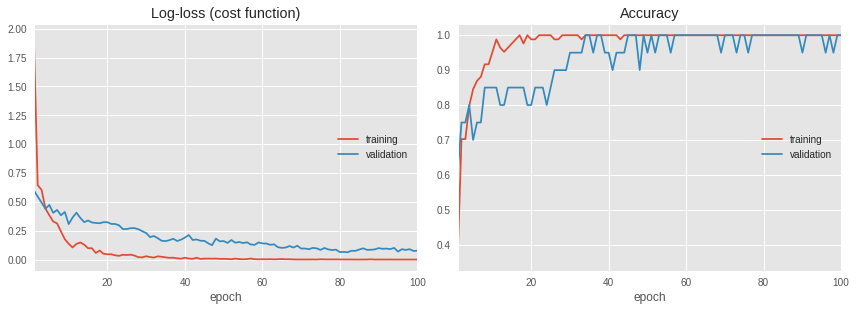

16/16 [==============================] - 0s 335us/step
Test score: 0.3967306911945343
Test accuracy: 0.875


In [0]:
np.random.seed(123)
tf.set_random_seed(123)
rmsprop=RMSprop(lr=0.0001)
model=Sequential()
model.add(Flatten(input_shape=(7,7,512)))
model.add(Dense(128,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_input_train,Y_train,batch_size=32,epochs=100,verbose=0,validation_data=(X_input_validation,Y_validation),callbacks=[PlotLossesKeras()])
score=model.evaluate(X_input_test,Y_test,verbose=1)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Perform the neural network over the test set.
print('Evaluating the test set...........')
score = model.evaluate(X_input_test, Y_test)
print('---------------------------------------------------')
print('---------------------------------------------------')
print('---------------------------------------------------')
print('\nTest score:', score[0])
print('Test accuracy:', score[1])
yPred= model.predict(X_input_test)
print("AUC",roc_auc_score(Y_test, yPred))

Evaluating the test set...........
16/16 [==============================] - 0s 419us/step
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------

Test score: 0.3967306911945343
Test accuracy: 0.875
AUC 0.953125


In [0]:
yPred

array([[2.0465007e-02],
       [1.8696090e-02],
       [3.6285836e-03],
       [7.4091362e-04],
       [1.6723029e-04],
       [2.5350074e-03],
       [3.0294884e-02],
       [8.3924852e-02],
       [1.9770429e-02],
       [9.7748154e-01],
       [9.9423212e-01],
       [1.4891198e-01],
       [9.9040633e-01],
       [7.4748456e-01],
       [9.8693836e-01],
       [9.8779404e-01]], dtype=float32)

In [0]:
d={'Real': class_test,'Prediccion': predicted_classes,'Objeto':range(len(pr_class))}
results=pd.DataFrame(d)
pd.pivot_table(results,values='Objeto',index=['Prediccion'],columns=['Real'],aggfunc='count',margins=True).fillna('')

Real,Quinua Aurora,Quinua Blanca,All
Prediccion,,,
Quinua Aurora,2,9,11
Quinua Blanca,10,3,13
All,12,12,24


## Opcion 2 Carga Datos

In [0]:
# Create a random sorted list to split set of images in train and test.
import random

randomList= random.sample(range(1,31),30)

formating = "{:d}".format

formatedList = [
    formating(
    item
    )
    for item in randomList]

In [0]:
from PIL import Image
from PIL import Image

# The target size is set due to Xception neural networks requisities. 

xsize = 256
ysize = 256

paths=['Quinua Aurora','Quinua Blanca']

maxImage= 120
image_list = np.empty((120,xsize,ysize,3))
pre=''
QuinuaKind=-1

xL=[]
yL=[]

n=0

# For to read, resize and split data into train and test.
for j in paths[:]:
    if(j=='Quinua Aurora'):
        pre='/QA-'
        QuinuaKind=1
    elif(j=='Quinua Blanca'):
        pre='//QB-'
        QuinuaKind=0
        
    counter=0
    for i in formatedList[:]:
      
      for t in (1, 2):
      
        
        # Resize images to 224X224
        
        img = Image.open('Fotos/'+j+pre+i+' ('+str(t)+').jpg')
        wpercent = (xsize/float(img.size[0]))
        img = img.resize((xsize,ysize), Image.ANTIALIAS)
        img.save('Fotos/'+j+pre+i+' ('+str(t)+').jpg')
        
        # Load resized image to save into train or test array.
        img = load_img('Fotos/'+j+pre+i+' ('+str(t)+').jpg',grayscale=False,target_size=(xsize,ysize),interpolation='nearest') 
        x= img_to_array(img)
        #x = x.reshape((1,) + x.shape)
        image_list[n]=x
     
        xL.append(x)
        yL.append(QuinuaKind)
        
        
          
        counter=counter+1

In [0]:
# Convert lists to arrays.
from sklearn.model_selection import train_test_split

xList=np.asarray(xL)
yList=np.asarray(yL)

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# Encode class values as integers.
encoder = LabelEncoder()
encoder.fit(yList)
encoded_Y = encoder.transform(yList)
# Convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

xTrain,xTest,yTrain,yTest = train_test_split(xList, y, test_size=0.2, random_state=22)

In [0]:
# Remove column in array of multiclass
yTrain = np.delete(yTrain, np.s_[0], axis=1) 
yTest = np.delete(yTest, np.s_[0], axis=1) 

In [0]:
image_list_validation.shape

(36, 224, 224, 3)

In [0]:
Y_validation.shape

(36, 1)

## Convolutional Neural Network

In [0]:
# Images general information.

# Data path information.
trainDataPath= 'datasets/train'
testDataPath= 'datasets/test'

# Images dimensions.


# Batch Size.

batchSize = 10

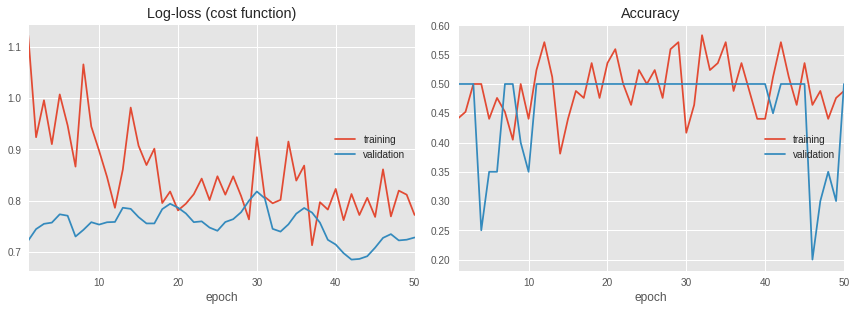

In [0]:
np.random.seed(4567)
model_CNN = Sequential()
N1=64
N2=32
N3=16
kernel = (3,3)

model_CNN = Sequential()
model_CNN.add(Conv2D(N1, kernel, padding='same', input_shape=(224,224,3)))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.5))

model_CNN.add(Conv2D(N2, kernel, padding='same'))
model_CNN.add(Activation('tanh'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.5))

model_CNN.add(Conv2D(N3, kernel, padding='same'))
model_CNN.add(Activation('relu'))
#model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Dense(8, activation = 'relu'))
model_CNN.add(Dropout(0.5))

model_CNN.add(Flatten())
model_CNN.add(Dense(1))
model_CNN.add(Activation('sigmoid'))

model_CNN.summary()

op= adam(lr=0.0001)
model_CNN.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

batch_size = 32
model_CNN.fit(image_list_train,Y_train, epochs = 50, verbose = 2,batch_size=batch_size, validation_data=(image_list_validation,Y_validation), callbacks=[PlotLossesKeras()])

model_CNN.save('Conv2D.h5')

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Perform the neural network over the test set.
print('Evaluating the test set...........')
score = model_CNN.evaluate(image_list_test, Y_test)
print('---------------------------------------------------')
print('---------------------------------------------------')
print('---------------------------------------------------')
print('\nTest score:', score[0])
print('Test accuracy:', score[1])
yPred= model_CNN.predict(image_list_test)
print("AUC",roc_auc_score(Y_test, yPred))

Evaluating the test set...........
16/16 [==============================] - 0s 14ms/step
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------

Test score: 0.718747615814209
Test accuracy: 0.5
AUC 0.265625


In [0]:
from keras.utils import plot_model
from keras.models import load_model
from google.colab import files

import pydot
import graphviz

mixModel=load_model("Conv2D.h5")
plot_model(mixModel, to_file='Conv2D_model.png',show_shapes=True, show_layer_names=True,rankdir='TB')

files.download('Conv2D_model.png')
from google.colab import files
files.download('Conv2D_model.png')

In [0]:
pr_class=model.predict_classes(X_input_test)
predicted_classes = []
for i in pr_class:
    predicted_classes.append(classes[i])

TypeError: ignored

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['0']

# Predict class in test.
Y_pred = model.predict(X_input_test)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(np.argmax(Y_test,axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(np.argmax(Y_test,axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
    0
0  24
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        24

avg / total       1.00      1.00      1.00        24



In [0]:
Y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

## Dense Neural Network

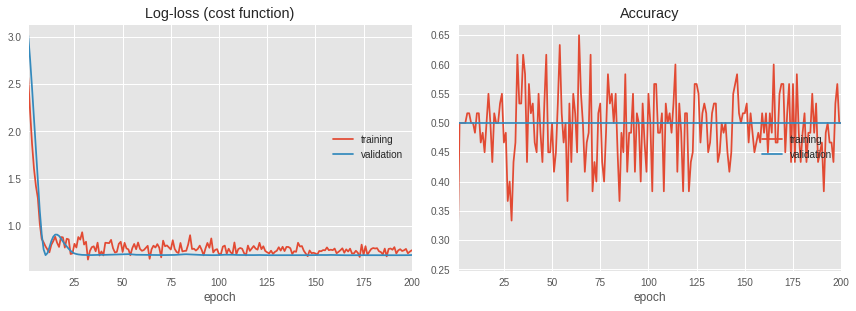

In [0]:
from numpy.random import seed
seed(123)
output = 1
#input_shape = (7000, 784)
# Creates a ANN model using keras.

neurons= 256
neurons2=128
neurons3=64
model=Sequential()
model.add(Flatten(input_shape=(224,224,3)))
#model.add(BatchNormalization())
model.add(Activation('tanh'))
#model_NN.add(Dropout(0.3,seed=123))
model.add(Dense(neurons2))
model.add(Dropout(0.5,seed=123))
model.add(Activation('tanh'))
model.add(Dense(neurons3))
#model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5,seed=123))
model.add(Dense(output))
model.add(Activation("sigmoid"))
model.summary(70)

#Defines optimizer.
op = adam(lr=0.001)

# Compile the neural network.
model.compile(loss='binary_crossentropy',
             optimizer=op,
              metrics=['accuracy'])

batch_size = 32
epochs = 200

training= model.fit(image_list_train,Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = False, 
                    validation_data=(image_list_validation,Y_validation),
                    callbacks=([PlotLossesKeras()]))



#model_NN.save('Model_NN.h5')

#files.download('TS_Demanda_Conv1D.h5')

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Perform the neural network over the test set.
print('Evaluating the test set...........')
score = model.evaluate(xTest, yTest)
print('---------------------------------------------------')
print('---------------------------------------------------')
print('---------------------------------------------------')
print('\nTest score:', score[0])
print('Test accuracy:', score[1])
yPred= model.predict(xTest)
print("AUC",roc_auc_score(yTest, yPred, average='macro'))

Evaluating the test set...........
24/24 [==============================] - 0s 594us/step
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------

Test score: 0.6929731965065002
Test accuracy: 0.5833333134651184
AUC 0.5


In [0]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['0','1']

# Predict class in test.
Y_pred = model.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(np.argmax(yTest,axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(np.argmax(yTest,axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
   0   1
0  0  10
1  0  14
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.58      1.00      0.74        14

avg / total       0.34      0.58      0.43        24



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Transfer Learning

In [0]:
########## transfer learnring ##########

from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

modelPretrainedTF = VGG19(weights='imagenet', include_top=False,input_shape=(xTrain.shape[1:]))

80142336/80134624 [==============================] - 8s 0us/step


In [0]:
# Pre-process X.
newXtrain=modelPretrainedTF.predict(xTrain)

# Pre-process X.
newXtest=modelPretrainedTF.predict(xTest)

xSize = newXtrain.shape[1]
ySize = newXtest.shape[2]

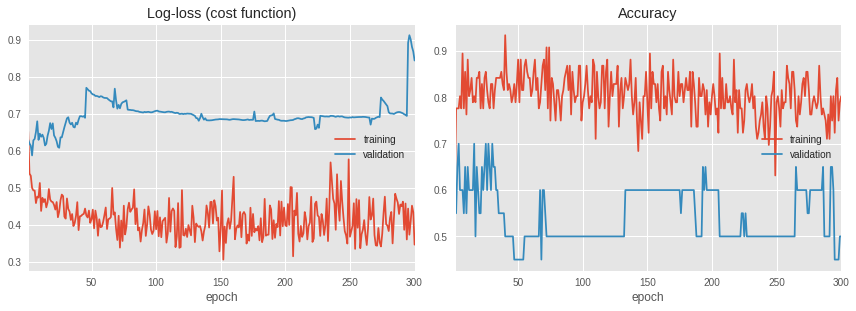

In [0]:
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
### Transfer Learning Neural Network.

from keras import backend as K
K.clear_session()

# Model structure.
outputClasses = 2

# Create the model. 
cnnTransferColor = Sequential()

# Apply a convolutional layer. 
cnnTransferColor.add(Flatten(input_shape=newXtrain.shape[1:]))

# Add the fully connected.
cnnTransferColor.add(Dense(512, activation='sigmoid',init='uniform'))
cnnTransferColor.add(BatchNormalization())

# Add a dropout.
cnnTransferColor.add(Dropout(0.7))

# Add the fully connected.
cnnTransferColor.add(Dense(outputClasses,init='uniform'))
cnnTransferColor.add(BatchNormalization())

# Add the activation softmax.
cnnTransferColor.add(Activation('sigmoid'))

print(cnnTransferColor.summary(70))

# Compile the model. 

op = adam(lr=0.001)

cnnTransferColor.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 10
epochs = 300

trainingCNN_Transfer = cnnTransferColor.fit(newXtrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split = 0.2,
                    callbacks=[PlotLossesKeras()])

cnnTransferColor.save('imaNNtrainedColor.h5')

In [0]:
score=cnnTransferColor.evaluate(newXtest,yTest,verbose=1)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

24/24 [==============================] - 0s 309us/step
Test score: 0.6387891173362732
Test accuracy: 0.7083333134651184


In [0]:
pr_class=cnnTransferColor.predict_classes(newXtest)
predicted_classes = []
for i in pr_class:
    predicted_classes.append(paths[i])

In [0]:
import pandas as pd
d={'Real': yList,'Prediccion': predicted_classes,'Objeto':range(120)}
results=pd.DataFrame(d)
pd.pivot_table(results,values='Objeto',index=['Prediccion'],columns=['Real'],aggfunc='count',margins=True).sort_values('All').fillna('')

ValueError: ignored

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['0','1','2','3','4','5','6','7','8','9']

# Predict class in test.
Y_pred = model.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(np.argmax(yTest,axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(np.argmax(yTest,axis=1), y_pred, target_names=target_names))

## Modelos con Dimensiones de VGG16

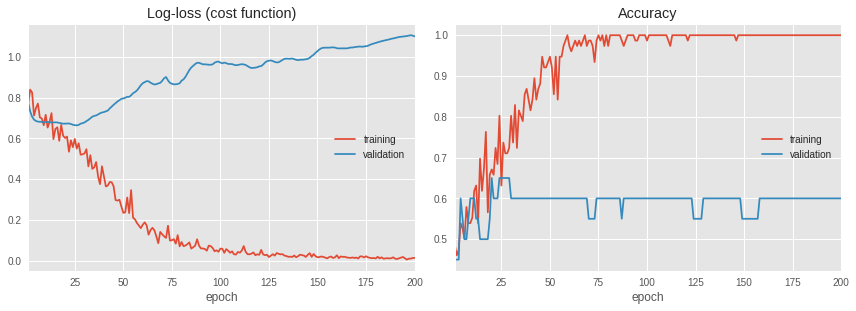

In [0]:
np.random.seed(4567)
model_CNN = Sequential()
N1=128
N2=64
N3=32
kernel = (3,3)

model_CNN = Sequential()
model_CNN.add(Conv2D(N1, kernel, padding='same', input_shape=(8,8,512)))
model_CNN.add(Activation("tanh"))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.5))

model_CNN.add(Conv2D(N2, kernel, padding='same'))
model_CNN.add(Activation('tanh'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.5))

model_CNN.add(Conv2D(N3, kernel, padding='same'))
model_CNN.add(Activation('tanh'))
#model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Dense(16, activation = 'tanh'))
model_CNN.add(Dropout(0.5))

model_CNN.add(Flatten())
model_CNN.add(Dense(2))
model_CNN.add(Activation('sigmoid'))

model_CNN.summary()

op= adam(lr=0.0001)
model_CNN.compile(loss='categorical_crossentropy', optimizer=op, metrics=['accuracy'])

batch_size = 32
model_CNN.fit(newXtrain,yTrain, epochs = 200, verbose = 2,batch_size=batch_size, validation_split=0.2, callbacks=[PlotLossesKeras()])

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Perform the neural network over the test set.
print('Evaluating the test set...........')
score = model_CNN.evaluate(newXtest, yTest)
print('---------------------------------------------------')
print('---------------------------------------------------')
print('---------------------------------------------------')
print('\nTest score:', score[0])
print('Test accuracy:', score[1])
yPred= model_CNN.predict(newXtest)
print("AUC",roc_auc_score(yTest, yPred))

Evaluating the test set...........
24/24 [==============================] - 0s 317us/step
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------

Test score: 1.673675537109375
Test accuracy: 0.6666666865348816
AUC 0.6035714285714285


In [0]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['0','1']

# Predict class in test.
Y_pred = model.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(np.argmax(yTest,axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(np.argmax(yTest,axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
   0   1
0  0  10
1  0  14
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        10
          1       0.58      1.00      0.74        14

avg / total       0.34      0.58      0.43        24



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Augmentation Method


In [0]:
from scipy.ndimage import rotate

In [0]:
image_list_90=[]

for i in range(0,image_list.shape[0]):
    image_list_90.append(rotate(image_list[i], 90))

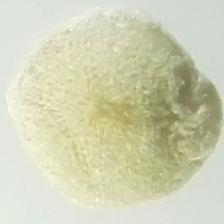

In [0]:
array_to_img(image_list_90[119])

In [0]:
image_list_180=[]

for i in range(0,image_list.shape[0]):
    image_list_180.append(rotate(image_list[i], 180))

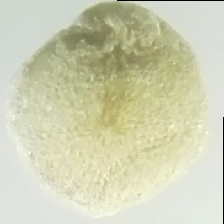

In [0]:
array_to_img(image_list_180[119])

In [0]:
image_list_270=[]

for i in range(0,image_list.shape[0]):
    image_list_270.append(rotate(image_list[i], 270))

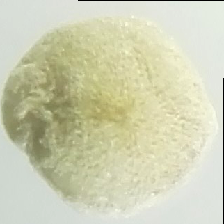

In [0]:
array_to_img(image_list_270[119])

In [0]:
frames = [image_list,image_list_90,image_list_180 ,image_list_270]
X = np.concatenate((frames), axis=0)
X.shape

(480, 224, 224, 3)

In [0]:
y1 = np.ones((60,), dtype=np.int)
y0 = np.zeros((60,), dtype=int)

In [0]:
y = []
y.append(y1)
y.append(y0)

y.append(y1)
y.append(y0)

y.append(y1)
y.append(y0)

y.append(y1)
y.append(y0)

y = np.asarray(y)
y = y.reshape(480,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train.shape

(384, 224, 224, 3)

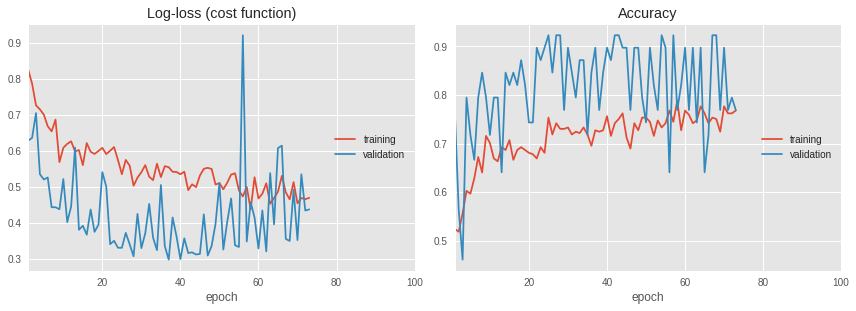

Epoch 74/100


In [0]:
np.random.seed(4567)
model_CNN = Sequential()
N1=256
N2=128
N3=64
N4=32
kernel = (3,3)

model_CNN = Sequential()
model_CNN.add(Conv2D(N1, kernel, padding='same', input_shape=(224,224,3)))
model_CNN.add(Activation('tanh'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.5))

model_CNN.add(Conv2D(N2, kernel, padding='same'))
model_CNN.add(Activation('tanh'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.5))

model_CNN.add(Conv2D(N3, kernel, padding='same'))
model_CNN.add(Activation('tanh'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Dense(N4, activation = 'elu'))
model_CNN.add(Dropout(0.5))

model_CNN.add(Flatten())
model_CNN.add(Dense(1))
model_CNN.add(Activation('sigmoid'))

model_CNN.summary()

op= adam(lr=0.0001)
model_CNN.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

batch_size = 10
model_CNN.fit(X_train,y_train, epochs = 100, verbose = 2,batch_size=batch_size, validation_split=0.1, callbacks=[PlotLossesKeras()])

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Perform the neural network over the test set.
print('Evaluating the test set...........')
score = model_CNN.evaluate(X_test, y_test)
print('---------------------------------------------------')
print('---------------------------------------------------')
print('---------------------------------------------------')
print('\nTest score:', score[0])
print('Test accuracy:', score[1])
yPred= model_CNN.predict(X_test)
print("AUC",roc_auc_score(y_test, yPred))

Evaluating the test set...........
96/96 [==============================] - 2s 19ms/step
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------

Test score: 0.9140249490737915
Test accuracy: 0.6666666666666666
AUC 0.7323436797121008


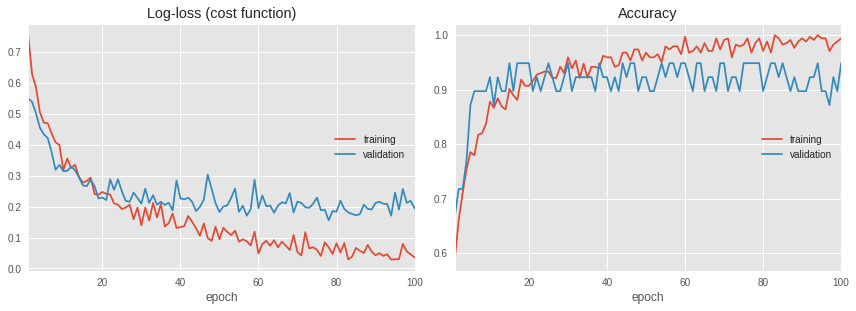

In [0]:
from numpy.random import seed
seed(123)
output = 1
#input_shape = (7000, 784)
# Creates a ANN model using keras.

#neurons= 64
neurons2=64
neurons3=32
model=Sequential()
model.add(Flatten(input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.3,seed=123))
model.add(Dense(neurons2))
model.add(Activation('elu'))
model.add(Dropout(0.3,seed=123))
model.add(Dense(neurons3))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(0.3,seed=123))
model.add(Dense(output))
model.add(Activation("sigmoid"))
model.summary(70)

#Defines optimizer.
op = RMSprop(lr=0.0001)

# Compile the neural network.
model.compile(loss='binary_crossentropy',
             optimizer=op,
              metrics=['accuracy'])

batch_size = 32
epochs = 100

training= model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = False, 
                    validation_split=0.1,
                    callbacks=([PlotLossesKeras()]))

model.save('DenseNeuralNet.h5')

#files.download('DenseNeuralNet.h5')

In [0]:
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
flatten_7 (Flatten)            (None, 150528)              0          
______________________________________________________________________
batch_normalization_7 (BatchNo (None, 150528)              602112     
______________________________________________________________________
activation_25 (Activation)     (None, 150528)              0          
______________________________________________________________________
dropout_19 (Dropout)           (None, 150528)              0          
______________________________________________________________________
dense_16 (Dense)               (None, 64)                  9633856    
______________________________________________________________________
activation_26 (Activation)     (None, 64)                  0          
______________________________________________________________________
dropou

In [0]:
from keras.utils import plot_model
from keras.models import load_model
from google.colab import files

import pydot
import graphviz

mixModel=load_model("DenseNeuralNet.h5")
plot_model(mixModel, to_file='Dense_model.png',show_shapes=True, show_layer_names=True,rankdir='TB')

files.download('Dense_model.png')
from google.colab import files
files.download('Dense_model.png')

In [0]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Perform the neural network over the test set.
print('Evaluating the test set...........')
score = model.evaluate(X_test, y_test)
print('---------------------------------------------------')
print('---------------------------------------------------')
print('---------------------------------------------------')
print('\nTest score:', score[0])
print('Test accuracy:', score[1])
yPred= model.predict(X_test)
print("AUC",roc_auc_score(y_test, yPred))

Evaluating the test set...........
96/96 [==============================] - 0s 1ms/step
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------

Test score: 0.41054389874140423
Test accuracy: 0.8333333333333334
AUC 0.9226270805218173


In [0]:
yPred

array([[9.6476544e-04],
       [9.6754092e-01],
       [9.9933499e-01],
       [4.7170620e-02],
       [9.6273118e-01],
       [9.9999309e-01],
       [1.8138431e-02],
       [9.6395111e-01],
       [8.8132389e-02],
       [9.3403069e-05],
       [9.8884821e-01],
       [9.9998069e-01],
       [2.0436845e-03],
       [9.6648085e-01],
       [9.9967313e-01],
       [3.9582253e-01],
       [9.9845004e-01],
       [2.7084187e-02],
       [5.7774135e-03],
       [9.9448204e-01],
       [1.7747772e-04],
       [9.8608649e-01],
       [4.5671390e-05],
       [9.9835628e-01],
       [6.2284428e-03],
       [6.1260583e-03],
       [1.0359630e-06],
       [5.4854172e-04],
       [1.8448716e-03],
       [3.8281861e-01],
       [9.6924502e-01],
       [9.9993026e-01],
       [2.0223545e-01],
       [1.6566856e-04],
       [9.9980789e-01],
       [9.4219089e-01],
       [1.6710768e-02],
       [9.9982709e-01],
       [1.3024615e-02],
       [9.9893183e-01],
       [9.2141191e-03],
       [1.459557

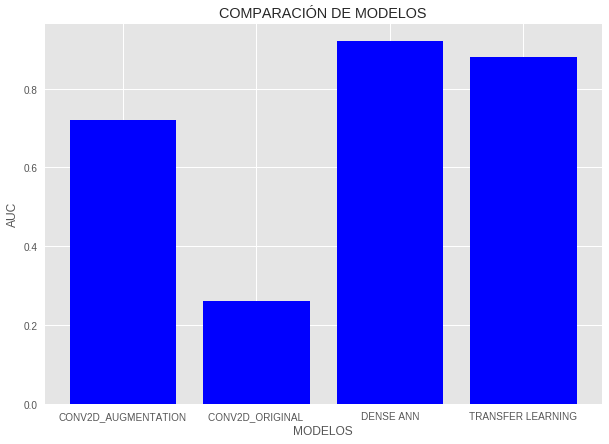

In [0]:
plt.figure(figsize=(10,7))
plt.bar(["CONV2D_ORIGINAL ","CONV2D_AUGMENTATION","DENSE ANN","TRANSFER LEARNING"],[0.26,0.72,0.92,0.88],color="blue",align='center')
plt.title("COMPARACIÓN DE MODELOS")
plt.xlabel("MODELOS",fontsize=12)
plt.ylabel("AUC")
plt.show()